# League of Legends Professional Game Data
# LSTM Neural Network to Predict Game Wins/Losses
## Michael Phillips

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

Using TensorFlow backend.


Running the following cell will utilize a Python script to take raw game data and return properly formatted arrays suitable for feeding to an LSTM network. 

The script will take approx. 3 minutes to complete.

In [2]:
%run data_formatting.py

X_train shape:  (169440, 10, 22)
y_train shape:  (169440,)
X_test shape:  (42345, 10, 22)
y_test shape:  (42345,)


In [3]:
df.head()

,match_id,time,gold,top_gold,jgl_gold,mid_gold,adc_gold,sup_gold,kill_total,assist_total,...,r_herald_count,r_drag_count,b_inhib_count,b_baron_count,b_tower_count,b_herald_count,b_dragon_count,kda,opp_kda,result
0,001a1f289e3bab22_b,0.0,2415.0,475.0,475.0,475.0,475.0,515.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001a1f289e3bab22_b,1.0,2430.0,475.0,475.0,475.0,475.0,530.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001a1f289e3bab22_b,2.0,2751.0,532.0,552.0,532.0,532.0,603.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001a1f289e3bab22_b,3.0,3929.0,849.0,817.0,791.0,686.0,786.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001a1f289e3bab22_b,4.0,5219.0,1099.0,1099.0,1107.0,976.0,938.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
model = Sequential()
model.add(Dense(50,batch_input_shape=(4705, X_train[:-64].shape[1],X_train[:-64].shape[2]),
               kernel_constraint=maxnorm(1)))
model.add(Dropout(0.2))
model.add(LSTM(45, stateful=True))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
         optimizer='rmsprop',
         metrics=['accuracy'])

In [6]:
loss = []
acc = []
for i in range(50):
    history = model.fit(X_train[:-64],y_train[:-64],batch_size=4705,shuffle=False,epochs=1,verbose=0)
    loss.append(history.history['loss'])
    acc.append(history.history['acc'])
    model.reset_states()

In [7]:
score = model.evaluate(X_test[:-31], y_test[:-31], verbose=0,batch_size=4705)
score

[0.62798559003406096, 0.63617901007334388]

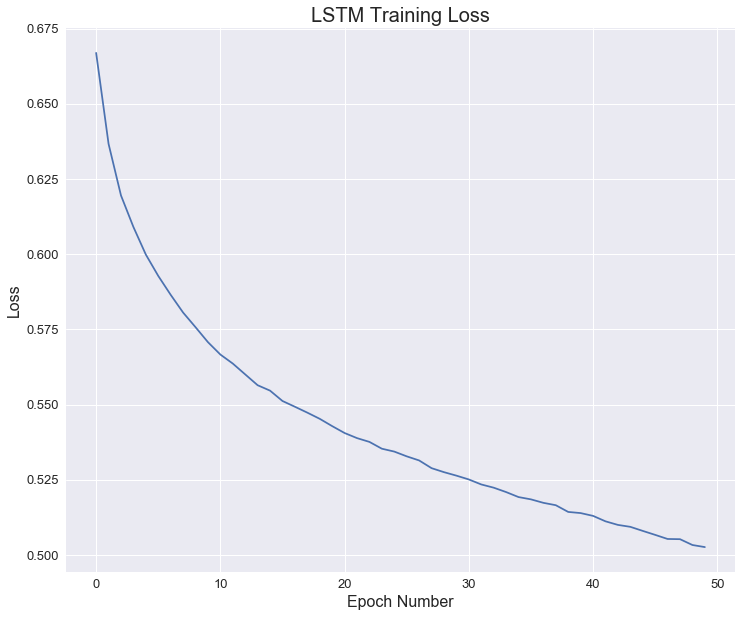

In [14]:
%matplotlib inline
# create plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
plt.plot(loss);
plt.title("LSTM Training Loss",fontsize=20)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Epoch Number", fontsize=16)
plt.ylabel("Loss", fontsize=16);

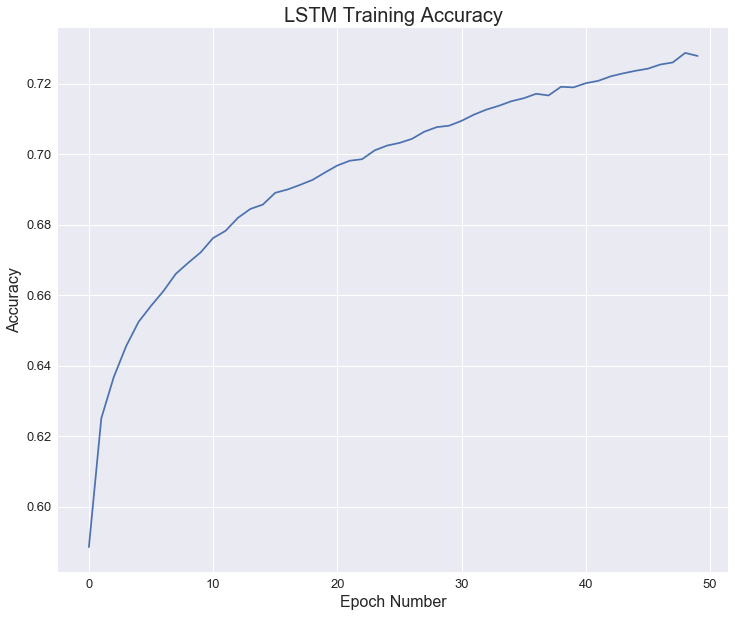

In [11]:
# create plot
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
plt.plot(acc);
plt.title("LSTM Training Accuracy",fontsize=20)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Epoch Number", fontsize=16)
plt.ylabel("Accuracy", fontsize=16);

In [21]:
%run single_game_formatting.py

In [77]:
batch_1 = 1

model2 = Sequential()
model2.add(Dense(50,batch_input_shape=(batch_1, X_train[:-64].shape[1],X_train[:-64].shape[2]),
               kernel_constraint=maxnorm(1)))
model2.add(Dropout(0.2))
model2.add(LSTM(45, stateful=True))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',
         optimizer='rmsprop',
         metrics=['accuracy'])

calc_weights = model.get_weights()
model2.set_weights(calc_weights)

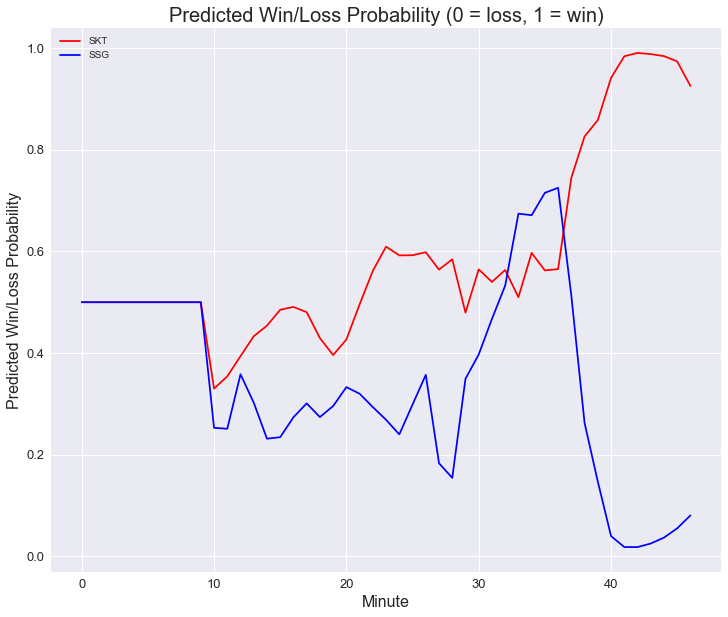

In [84]:
red = model2.predict(xg2r,batch_size=batch_1)
blue = model2.predict(xg2b,batch_size=batch_1)

red = red.ravel().tolist()
for i in range(10):
    red.insert(0,0.5)

blue = blue.ravel().tolist()
for i in range(10):
    blue.insert(0,0.5)

fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
plt.plot(red, color='r',label='SKT')
plt.plot(blue, color='b',label='SSG');
plt.title("Predicted Win/Loss Probability (0 = loss, 1 = win)",fontsize=20)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("Minute", fontsize=16)
plt.legend()
plt.ylabel("Predicted Win/Loss Probability", fontsize=16);